#### Note that i have installed the packages using a virtualenv using the ipykernel package. I will create a <i> requirements.txt </i> file to store the external libraries 

In [43]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import random

In [44]:
df = pd.read_csv('./data/mental-heath-in-tech.csv')

In [45]:
df.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


A lot of rows and a lot of columns. We also have a lot of `NaN` values, that we need to take care of. First let's do some data preprocessing, before we do our visualizations. 

In [46]:
# ----------- CLEANING THE DATA -----------
# Column rename
renamed_columns = ['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'tech_role_flag', 'mh_coverage_flag',
                  'mh_coverage_awareness_flag', 'mh_employer_discussion', 'mh_resources_provided', 'mh_anonimity_flag',
                  'mh_medical_leave', 'mh_discussion_neg_impact', 'ph_discussion_neg_impact', 'mh_discussion_cowork',
                  'mh_discussion_supervis', 'mh_eq_ph_employer', 'mh_conseq_coworkers', 'mh_coverage_flag2', 'mh_online_res_flag',
                  'mh_diagnosed&reveal_clients_flag', 'mh_diagnosed&reveal_clients_impact', 'mh_diagnosed&reveal_cowork_flag', 'mh_cowork_reveal_neg_impact',
                  'mh_prod_impact', 'mh_prod_impact_perc', 'prev_employers_flag', 'prev_mh_benefits', 'prev_mh_benefits_awareness',
                  'prev_mh_discussion', 'prev_mh_resources', 'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq', 'prev_ph_discuss_neg_conseq',
                  'prev_mh_discussion_cowork', 'prev_mh_discussion_supervisor', 'prev_mh_importance_employer', 'prev_mh_conseq_coworkers',
                  'future_ph_specification', 'why/why_not', 'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career', 'mh_neg_view_cowork',
                  'mh_sharing_friends/fam_flag', 'mh_bad_response_workplace', 'mh_for_others_bad_response_workplace', 'mh_family_hist',
                  'mh_disorder_past', 'mh_disorder_current', 'yes:what_diagnosis?', 'maybe:whats_your_diag', 'mh_diagnos_proffesional',
                  'yes:condition_diagnosed', 'mh_sought_proffes_treatm', 'mh_eff_treat_impact_on_work', 'mh_not_eff_treat_impact_on_work',
                  'age', 'sex', 'country_live', 'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position', 'remote_flag']
df.columns = renamed_columns


In [47]:
#verifying, that every 4th column has been renamed correctly
print(df.columns[::4])

Index(['self_empl_flag', 'mh_coverage_flag', 'mh_anonimity_flag',
       'mh_discussion_cowork', 'mh_coverage_flag2',
       'mh_diagnosed&reveal_cowork_flag', 'prev_employers_flag',
       'prev_mh_resources', 'prev_mh_discussion_cowork',
       'future_ph_specification', 'mh_hurt_on_career',
       'mh_for_others_bad_response_workplace', 'yes:what_diagnosis?',
       'mh_sought_proffes_treatm', 'sex', 'work_us_teritory'],
      dtype='object')


We want to represent the gender as numeric values this will eventuallly make it easier for us to do our visualizations and also ensure, that we are using the correct format for our models. This process is also refered to as <i>encoding </i>. Many different types of encoding techniques are used. 

In our case we only we have different types of categorical data `men`, `women` and `other`.
In this dataset these values are represented in many different string values: `m`, `male`, `man`. These all represent the same value in our case, and we will therefore map them to a numeric value `1`, `2` and `3` respectively.

In [48]:
df['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 3, inplace = True)

In [49]:
df['sex'].sample(10)

1405    1.0
865     1.0
1043    1.0
1134    2.0
804     1.0
1254    1.0
1335    1.0
119     1.0
1341    2.0
690     1.0
Name: sex, dtype: float64

Great now we have numeric values for our genders. But maybe we still have a problem.
Currently the sex values are presented using numeric values, but the machine learning value, might derterminate the values of the numbers respectively to one another. 

so since `male = 1` and `other = 3`, other has a higher value than male, which is a problem, since there is no relation between the values. 

We will look at this later, when we do `OneHotEncoding`


In [50]:
# Recode Comp size & country columns (for ease when doing plots)
df['comp_no_empl'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

# Max age is 323, min age is 3.
# There are only 5 people that have weird ages (3yo, 15yo, or 99yo or 323 yo.) 
# These people will take the average age of the dataset (the correct calculated one, w/out outliers)


In [51]:
df['age'].value_counts()

30     94
31     82
29     79
28     74
35     74
32     72
34     69
33     69
26     64
27     63
37     59
39     55
38     54
36     50
25     44
24     42
40     36
22     32
44     31
43     30
42     29
45     27
23     24
41     24
46     22
21     15
47     14
49     13
55     12
48      9
50      9
54      7
51      7
52      7
20      6
56      5
57      4
63      4
19      4
53      3
61      2
59      2
17      1
15      1
323     1
99      1
58      1
62      1
65      1
66      1
70      1
74      1
3       1
Name: age, dtype: int64

Above we just looked at the unique ages. No need for any specific data cleaning, we will however add another step to replace values below 18 or above 75 with the mean age of the dataset. 

In [52]:
mean_age = df[(df['age'] >= 18) | (df['age'] <= 75)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)

<AxesSubplot:>

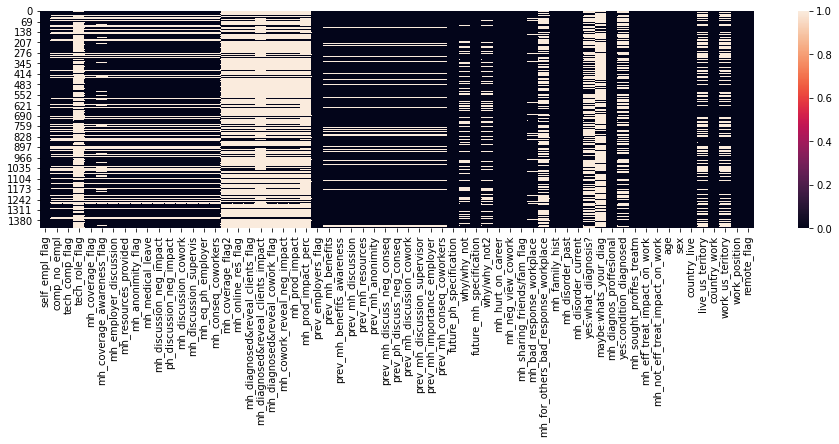

In [53]:
plt.figure(figsize=(16, 4))
sns.heatmap(data = df.isna())

We can see, that we have a lot of `NaN` values in our dataset. We want to make a check to see if over 50% of the data contains `Nan` values, we want to drop them 

In [54]:
len(df.columns)

63

In [55]:
cols = (df.shape[0]/2 <= df.isna().sum()).tolist()
columns_to_drop = df.columns[cols]
df.drop(labels=columns_to_drop, axis=1, inplace=True)

Drop 13 columns 

In [56]:
len(df.columns)

50

Now we have to replace the remaining `Nan` values in the columns, that we have selected to work with. We could use different metrics like `mean`, `median` or `most_frequent`. In our case we will use `most_frequent` because this makes most sense for our data (because the mean or median would not make much sense for categorical data either)


In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [59]:
imp.fit(df)

SimpleImputer(strategy='most_frequent')

In [60]:
imputed_df = pd.DataFrame(data=imp.transform(df), columns=df.columns)

In [61]:
imputed_df.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,live_us_teritory,country_work,work_us_teritory,work_position,remote_flag
0,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,1,UK,California,UK,California,Back-end Developer,Sometimes
1,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,1,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,1,UK,California,UK,California,Back-end Developer,Always
3,1,26-100,1,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Sometimes,Sometimes,43,1,UK,California,UK,California,Supervisor/Team Lead,Sometimes
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,2,USA,Illinois,USA,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [62]:
none_encoding_columns = ['age', 'why/why_not', 'why/why_not2', 'country_live',
       'live_us_teritory', 'country_work', 'work_us_teritory', 'work_position']

In [63]:
columns_to_encode = [x for x in imputed_df.columns if x not in none_encoding_columns]

Above i have shown all the columns, that could be considered categorical. Now we want to split our dataframe into to seperate dataframes, one for the columns, that we want to encode, and want that does not.

In [64]:
data_to_encode = imputed_df[columns_to_encode]

In [65]:
data_not_encode = imputed_df[none_encoding_columns]

In [66]:
data_to_encode.head(3)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag
0,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,1,Sometimes
1,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,1,Never
2,0,6-25,1,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,1,Always


In [67]:
data_not_encode.head(3)

,age,why/why_not,why/why_not2,country_live,live_us_teritory,country_work,work_us_teritory,work_position
0,39,Fear of discrimination,Stigma,UK,California,UK,California,Back-end Developer
1,29,It would depend on the health issue. If there ...,While mental health has become a more prominen...,USA,Illinois,USA,Illinois,Back-end Developer|Front-end Developer
2,38,"They would provable need to know, to Judge if ...","Stigma, mainly.",UK,California,UK,California,Back-end Developer


### Encoding

As mentioned previously in the notebook, we are going to encode our categorical data 

---

<b>Note:</b> our `data_note_enode` dataframe also contains categorical data, we have just chosen some specific features, that we want to work with. We could also encode features like `country_live` `country_work`, since they are also categorical features. But one using our encoding technique `one hot encoding` it will introduce some issues as described below

---


The main purpose of labelling is to transform our categorical or text based features into a data format, that our machine learning models can easily understand. We will use the `sklearn` library for this, which has many many encoding techniques, i will chose to focus on two different approaches:

#### label encoding

This technique is fairly simple and it just converts each possible category to an incrementing float. A demenonstration is given below, where we take all the categorical columns, and convert them using the label_encoder. This however introduces a new problem (as stated previously). Our model might assume, that we have some kind of hierarchy or order in our data. Here we can use `one hot encoding`


#### one hot encoding

This technique uses a seperate aproach for the label encoder by creating a new column for each possible feature and then only puts a value in the category that is chosen. 


An arbitrary example is given below:


```
| male | female | other |
|------|--------|-------|
| 1    | 0      | 0     |
| 0    | 1      | 0     |
| 1    | 0      | 0     |
```

Like in the example above, we could for example take the sex category (in our example we have already represented each `sex` by a numeric value), and represented each gender by it's own column. For every `female` entry we only put the value (we use to represent a binary value 1 = True, 0 = False), in the `female` column to represent, that the sex is female.


In [68]:
data_to_encode

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_disorder_current,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag
0,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,No,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,1,Sometimes
1,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,No,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,1,Never
2,0,6-25,1,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Maybe/Not sure,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,1,Always
3,1,26-100,1,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,No,No,Yes,Yes,Yes,1,Sometimes,Sometimes,1,Sometimes
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,2,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,26-100,1,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Maybe/Not sure,Yes,No,No,No,1,Not applicable to me,Not applicable to me,2,Sometimes
1429,1,26-100,1,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,Maybe/Not sure,Yes,No,No,Yes,0,Sometimes,Often,1,Sometimes
1430,0,100-500,1,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,...,"Yes, I observed",Yes,Yes,Maybe,Yes,1,Rarely,Sometimes,1,Sometimes
1431,0,100-500,0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,Maybe,...,"Yes, I experienced",Yes,Maybe,Yes,Yes,0,Sometimes,Often,2,Sometimes


In [69]:
#import encoders 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [70]:
#create function for decoding our dataset 
def encode(data: pd.DataFrame):
    #check out the data types and filter categorical columns
    print(data.select_dtypes)
    cat_columns = list(data.select_dtypes(include=['object', 'category']))
    #create a mask to filter out the column
    column_mask = []
    
    for column_name in (data.columns.values):
        column_mask.append(column_name in cat_columns)
        
    #instanciate encoders
    le = LabelEncoder()
    ohe = ColumnTransformer(
        [('one_hot_encoder', OneHotEncoder(), column_mask)], 
        remainder='passthrough')
    
    for column in cat_columns:
        data[column] = le.fit_transform(data[column])
    print(data)
    data = ohe.fit_transform(data)
    
    return data
    
    

In [73]:
encode(data_to_encode)
matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe
encoded_data.columns = data_to_encode.columns

<bound method DataFrame.select_dtypes of      self_empl_flag comp_no_empl tech_comp_flag  \
0                 0       26-100              1   
1                 0         6-25              1   
2                 0         6-25              1   
3                 1       26-100              1   
4                 0         6-25              0   
...             ...          ...            ...   
1428              1       26-100              1   
1429              1       26-100              1   
1430              0      100-500              1   
1431              0      100-500              0   
1432              0      100-500              1   

                     mh_coverage_flag mh_coverage_awareness_flag  \
0     Not eligible for coverage / N/A                         No   
1                                  No                        Yes   
2                                  No                         No   
3                                 Yes                         No   
4     

<ipython-input-70-49b81cfe8ab3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])


In [74]:
# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

In [75]:
df.columns

Index(['self_empl_flag', 'comp_no_empl', 'tech_comp_flag', 'mh_coverage_flag',
       'mh_coverage_awareness_flag', 'mh_employer_discussion',
       'mh_resources_provided', 'mh_anonimity_flag', 'mh_medical_leave',
       'mh_discussion_neg_impact', 'ph_discussion_neg_impact',
       'mh_discussion_cowork', 'mh_discussion_supervis', 'mh_eq_ph_employer',
       'mh_conseq_coworkers', 'prev_employers_flag', 'prev_mh_benefits',
       'prev_mh_benefits_awareness', 'prev_mh_discussion', 'prev_mh_resources',
       'prev_mh_anonimity', 'prev_mh_discuss_neg_conseq',
       'prev_ph_discuss_neg_conseq', 'prev_mh_discussion_cowork',
       'prev_mh_discussion_supervisor', 'prev_mh_importance_employer',
       'prev_mh_conseq_coworkers', 'future_ph_specification', 'why/why_not',
       'future_mh_specification', 'why/why_not2', 'mh_hurt_on_career',
       'mh_neg_view_cowork', 'mh_sharing_friends/fam_flag',
       'mh_bad_response_workplace', 'mh_family_hist', 'mh_disorder_past',
       'mh_dis

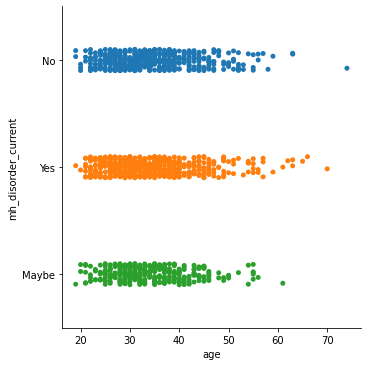

In [76]:
sns.catplot(x="age", y="mh_disorder_current", data=df)

In the above example we compare age and current mental disorder

Text(0.5, 6.79999999999999, 'Value 1 means male \nValue 2 means female \nValue 3 means other \n')

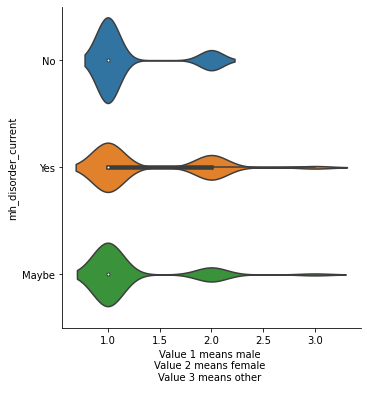

In [77]:
#because we have converted our categories into numeric categories i create a custom dictionary mapping the respective values to the sexes
labels = {'male': 1, 'female': 2, 'other': 3}

sns.catplot(x="sex", y="mh_disorder_current", kind="violin", data=df)

#Here we create a dynamic string to place the label on the plot 
plt.xlabel(''.join([f'Value {value} means {key} \n' for key, value in labels.items()]))

Analysis...

Now we build our ML models, and compare their accuracy. Then we will use our model, to predict these questions from the end users on a python server.


In [78]:
model_data = prep_data.copy()

In [79]:
numeric_columns = [cols for cols in model_data.columns if model_data[cols].dtypes in ['int64', 'float64']]

In [80]:
model_data = model_data[numeric_columns]

Here we are trying to create some models using our dataset, to see if we can make some prediction based on the data, we are going to try out a variety of different models, and see which one fits the best.

We mark our <i>y</i> variable as the <i>mh_disorder_current</i> to try to predict if a person has a mental illness or not. 

our <i>X </i> variable will be the remaining features

In [81]:
y = model_data['mh_disorder_current']

cols = [col for col in model_data.columns if col not in ['mh_disorder_current']]
X = model_data[cols]

In [82]:
y

0       1.0
1       2.0
2       1.0
3       2.0
4       2.0
       ... 
1428    1.0
1429    1.0
1430    0.0
1431    2.0
1432    2.0
Name: mh_disorder_current, Length: 1433, dtype: float64

In [83]:
X

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag
0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0,...,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0
1,0.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,...,4.0,1.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0
2,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,4.0,4.0,0.0,2.0
4,0.0,4.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,4.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
1429,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,3.0,0.0,2.0,1.0,1.0,0.0,4.0,2.0,0.0,2.0
1430,0.0,1.0,1.0,3.0,2.0,2.0,2.0,0.0,2.0,0.0,...,4.0,3.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,2.0
1431,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,4.0,2.0,2.0,0.0,1.0,0.0,4.0,2.0,1.0,2.0


We use the sklearn method <i> train_test_split </i> to split up our data. Here we define to parameters <i>test_size</i>, which defines the amount of the data we want to test the model on (the rest is used for training data). 

This is ofent refered to as `k-fold cross validation` where <i>k </i> is an arbitrary value.
Typically the data is split into portition `80:20` or `70:30`. It depends a lot on how spread out our data is (here we can look at parameters like <i>Gausian distribution</i> and other data visualizations). 

This is where `k-fold cross validation` comes into play.
In our case we have a "relatively" small dataset (only 1432 samples). Sometimes this can lead to a model overfitting (especially if we have a smaller test size). Because we train our model in a relatively small test set, the data will never get the correct metrics of our features, and this can lead to high bias. 

An example could be, that the training set, only had some features, that where of a certain value, of within a certain range of some spectrum. 

Then when we would apply our test data, the model would fit perfectly if the test data, had the same metrics. This would result in very hugh accuracy for the model, but the reality is much different. 

To prevent this, we split our training data, into different "Folds" (hence k-fold), to ensure, that our data is as spread out as possible. 

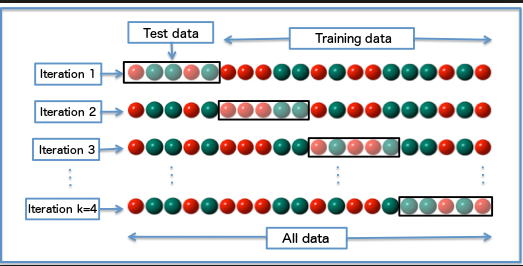

<b>Note:</b> the `train_test_split` funtion, does k-fold internally, by having the parameter `shuffle=True` internally. 

For demonstration purposes, we are also going to do a manual k-fold.
 


In [84]:
#K-fold demonstration

target = np.ones(50)
target[-10:] = 0

k_fold_df = pd.DataFrame({'feature_col': np.random.random(50), 'y_col': target})

In the above example we create a sample dataset where a random <i>y</i> variable with `40 "1" values and 10 "0" values`

In [85]:
k_fold_df.head(3)

,feature_col,y_col
0,0.039522,1.0
1,0.426851,1.0
2,0.618939,1.0


If we where to split this data ourselfes we would need to ensure, that the target values with `0` would need to be spread out as much as possible. Below if we use `train_test_split` with the `shuffle=False` parameter.


In [86]:
np.random.seed(0)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(k_fold_df.feature_col,k_fold_df.y_col, test_size=0.2, shuffle=False)

In [88]:
print(f'train: {y_test}, test: {y_train[:10]}')

train: 40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: y_col, dtype: float64, test: 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: y_col, dtype: float64


As shown above, all our test data is with the `0.0` value, while our training data is `1.0` this is a big problem, and we will mean that our mode is 100% going to overfit, because all of are training labels are on the same data 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(k_fold_df.feature_col,k_fold_df.y_col, test_size=0.2, shuffle=True)

In [90]:
print(f'train: {y_test}, test: {y_train[:10]}')

train: 28    1.0
11    1.0
10    1.0
41    0.0
2     1.0
27    1.0
38    1.0
31    1.0
22    1.0
4     1.0
Name: y_col, dtype: float64, test: 33    1.0
35    1.0
26    1.0
34    1.0
18    1.0
7     1.0
14    1.0
45    0.0
48    0.0
29    1.0
Name: y_col, dtype: float64


After we added the `shuffle=True` parameter, it is now randomly shuffled. This can however still become an issue with larger datasets. The way that the `train_test_split` determinants the split is by a parameter called `random_state`. Behind the scene, this number is splitting our data randomly. The problem will be, that we can not gaurentee, that it will still not overfit. We can be "unlucky", and a portion of same data with the same features (same `sex` or same `country` or whatever, can still end up in either test or train), everytime we use some parameter for `random_state` we know, that the data split will always be the same. We HAVE NOT specified `random_state` for the above example, because we want new results everytime

Later when we do hyper parameter optimization we will see if we can improve this.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
def create_model(model, name="Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f""" 
            Model: {name}
            {confusion_matrix(y_test, preds)} 
            'Accuracy': {round(accuracy_score(y_test, preds), 5)}
            """)

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

print(X_train)
print(y_train)
#Knn
knn = KNeighborsClassifier(n_neighbors=19)
create_model(knn, name="KNN")

r_forest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
create_model(r_forest, name="Random Forest")


      self_empl_flag  comp_no_empl  tech_comp_flag  mh_coverage_flag  \
390              0.0           1.0             1.0               3.0   
999              0.0           2.0             1.0               1.0   
812              0.0           0.0             1.0               1.0   
1233             0.0           1.0             1.0               3.0   
754              0.0           4.0             1.0               1.0   
...              ...           ...             ...               ...   
1095             0.0           5.0             0.0               3.0   
1130             0.0           0.0             1.0               3.0   
1294             0.0           5.0             1.0               0.0   
860              0.0           1.0             1.0               0.0   
1126             0.0           4.0             1.0               3.0   

      mh_coverage_awareness_flag  mh_employer_discussion  \
390                          2.0                     0.0   
999            

Random forrest gave us a really good prediction, while KNN was not that good, lets see if we can improve our KNN a bit.


In [94]:
def optimize_neighbor_param(max_neighbors = 30):
    scores = []
    for neighbor in range(max_neighbors):
        #since index starts a 0, i will just increment the index, to start from '1'
        neighbor = neighbor+1
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        score = round(accuracy_score(y_test, preds), 5)
        scores.append({'n': neighbor, 'accuracy': score})
    return scores

In [95]:
scores = optimize_neighbor_param(40)

In [96]:
def knn_plot(scores, marker):
    plt.plot([data['n'] for data in scores],
             [data['accuracy'] for data in scores], 
            marker)
    plt.title('KNN Accuracy score', fontsize=16)
    plt.xlabel('Amount of neighbors')
    plt.ylabel('Accuracy Score')

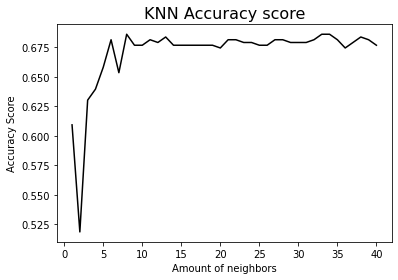

In [97]:
knn_plot(scores, 'k')

In the above cells, i created a function, to optimize our <i>k</i> parameter in our `knn` model. I created a generic functions, that takes an argument, `max_neighbors` as the maximum amount of neighbors to look through. Afterwards we save all the scores in a list of dictionaries and return it from the function.

Then i created another function, to plot the scores, which, we can use, to derterminate the marker, that we want to the function.

In [98]:
optimal_n = np.round(np.sqrt(prep_data.shape[0]))
optimal_n

38.0

Usually a good rule of thumb, is that you can use this formula to find the optimal <i>k</i> value \n

We use the mathematical symbol $\approx$ (two tildes)to derterminate, that we don't want a <i>float</i>, but an integer, because we can only use integers as neighbors

k $\approx$ $\sqrt{N}$
```
N = number of samples in the training dataset
```

In [99]:
actual_optimal = max(scores, key=lambda x: x['accuracy'])

In [100]:
actual_optimal

{'n': 8, 'accuracy': 0.68605}

In [101]:
all_optimal = [entry for entry in scores if entry['accuracy'] >= actual_optimal['accuracy']]

In [102]:
all_optimal

[{'n': 8, 'accuracy': 0.68605},
 {'n': 33, 'accuracy': 0.68605},
 {'n': 34, 'accuracy': 0.68605}]

Above we can see, that we actual have three different types of neighbors, that all give us an optimal solution 
<i>8, 33 and 34</i> Not too far off our original prediction of <i>38</i>

In [103]:
X

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_coverage_awareness_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,...,mh_sharing_friends/fam_flag,mh_bad_response_workplace,mh_family_hist,mh_disorder_past,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,sex,remote_flag
0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,5.0,1.0,...,4.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0
1,0.0,4.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,...,4.0,1.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,1.0
2,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,0.0,1.0,1.0,2.0,1.0,1.0,4.0,4.0,0.0,2.0
4,0.0,4.0,0.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,4.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
1429,1.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,3.0,0.0,...,3.0,0.0,2.0,1.0,1.0,0.0,4.0,2.0,0.0,2.0
1430,0.0,1.0,1.0,3.0,2.0,2.0,2.0,0.0,2.0,0.0,...,4.0,3.0,2.0,2.0,1.0,1.0,3.0,4.0,0.0,2.0
1431,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,4.0,2.0,2.0,0.0,1.0,0.0,4.0,2.0,1.0,2.0


Now lets dump our `Random Forest` model as a pickle file, so we can host it on a flask server

In [104]:
import joblib

In [105]:
joblib.dump(r_forest, '../flask-server/models/r_forst.pkl')

['../flask-server/models/r_forst.pkl']

In [106]:
model_columns = list(X)

In [107]:
joblib.dump(model_columns, '../flask-server/models/r_forst_columns.pkl')

['../flask-server/models/r_forst_columns.pkl']

In [108]:
joblib.dump(y_test, '../flask-server/models/label_test.pkl')

['../flask-server/models/label_test.pkl']

Okay so now we have another problem..
We have created our models, and everything is fine, but our new column names (which was renamed for easier work in our notebook, cannot be reused for the application. 

We want to create a dynamic application <b>With no hardcoded labels/questions</b> in our frontend.

The best way to handle this, is to create some kind of key value, store, that maps the `dataframe column name` to the `original column name`. As shown below

In [109]:
_df = pd.read_csv('./data/mental-heath-in-tech.csv')

In [110]:
_df.columns[:5]

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?'],
      dtype='object')

In [111]:
renamed_columns[:5]

['self_empl_flag',
 'comp_no_empl',
 'tech_comp_flag',
 'tech_role_flag',
 'mh_coverage_flag']

Since we are using python (the best langauge ;) ) we can easily use the built in `dict` and `zip` function to easily create a dictionary with <i>key-pair</i> value of the original column names and the renamed columns

In [112]:
d = dict(zip(_df.columns, renamed_columns))

In [113]:
import itertools


In [114]:
dict(itertools.islice(d.items(), 5))

{'Are you self-employed?': 'self_empl_flag',
 'How many employees does your company or organization have?': 'comp_no_empl',
 'Is your employer primarily a tech company/organization?': 'tech_comp_flag',
 'Is your primary role within your company related to tech/IT?': 'tech_role_flag',
 'Does your employer provide mental health benefits as part of healthcare coverage?': 'mh_coverage_flag'}

This is great. Now we have a dictionary with mappings of the original column name, along with our modified version, that we use on our flask server. Now we want to add the different value types.

So instead the best way we can do this, is by creating a list with nested lists of the unique values. This can be done, by iterating through the columns, and using the pandas `unique` function on our `Series` object. 

In [115]:
for column in df.columns:
    print(df[column].unique().tolist())

[0, 1]
['26-100', '6-25', nan, '>1000', '100-500', '500-1000', '1-5']
[1.0, nan, 0.0]
['Not eligible for coverage / N/A', 'No', nan, 'Yes', "I don't know"]
[nan, 'Yes', 'I am not sure', 'No']
['No', 'Yes', nan, "I don't know"]
['No', 'Yes', nan, "I don't know"]
["I don't know", 'Yes', nan, 'No']
['Very easy', 'Somewhat easy', 'Neither easy nor difficult', nan, 'Very difficult', 'Somewhat difficult', "I don't know"]
['No', 'Maybe', nan, 'Yes']
['No', nan, 'Maybe', 'Yes']
['Maybe', nan, 'Yes', 'No']
['Yes', 'Maybe', nan, 'No']
["I don't know", 'Yes', nan, 'No']
['No', nan, 'Yes']
[1, 0]
['No, none did', 'Yes, they all did', 'Some did', "I don't know", nan]
['N/A (not currently aware)', 'I was aware of some', 'Yes, I was aware of all of them', 'No, I only became aware later', nan]
["I don't know", 'None did', 'Some did', nan, 'Yes, they all did']
['None did', 'Some did', nan, 'Yes, they all did']
["I don't know", 'Yes, always', 'Sometimes', 'No', nan]
['Some of them', 'None of them', "I d

In [116]:
unique_values = []
for column in model_data.columns:
    entry = {'original_labels': sorted(list(filter(lambda v: v==v, df[column].unique().tolist()))), 'transformed_labels': sorted(model_data[column].unique().tolist())}
    unique_values.append(entry)

In [117]:
unique_values

[{'original_labels': [0, 1], 'transformed_labels': [0.0, 1.0]},
 {'original_labels': ['1-5', '100-500', '26-100', '500-1000', '6-25', '>1000'],
  'transformed_labels': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]},
 {'original_labels': [0.0, 1.0], 'transformed_labels': [0.0, 1.0]},
 {'original_labels': ["I don't know",
   'No',
   'Not eligible for coverage / N/A',
   'Yes'],
  'transformed_labels': [0.0, 1.0, 2.0, 3.0]},
 {'original_labels': ['I am not sure', 'No', 'Yes'],
  'transformed_labels': [0.0, 1.0, 2.0]},
 {'original_labels': ["I don't know", 'No', 'Yes'],
  'transformed_labels': [0.0, 1.0, 2.0]},
 {'original_labels': ["I don't know", 'No', 'Yes'],
  'transformed_labels': [0.0, 1.0, 2.0]},
 {'original_labels': ["I don't know", 'No', 'Yes'],
  'transformed_labels': [0.0, 1.0, 2.0]},
 {'original_labels': ["I don't know",
   'Neither easy nor difficult',
   'Somewhat difficult',
   'Somewhat easy',
   'Very difficult',
   'Very easy'],
  'transformed_labels': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]},


Now that we have our list, we will again use the zip function. to create a list of tuples containing each of our values 
```
1. the original column name
2. the mapped column name, 
3. the unique values
```
we could also have created a dictionary for each value, with the key being the name of the value, but since we know the order. we don't need that.

In [118]:
d = zip(_df.columns, renamed_columns, unique_values)

In [119]:
transformed_list = list(d)

In [120]:
transformed_list[:5]

[('Are you self-employed?',
  'self_empl_flag',
  {'original_labels': [0, 1], 'transformed_labels': [0.0, 1.0]}),
 ('How many employees does your company or organization have?',
  'comp_no_empl',
  {'original_labels': ['1-5',
    '100-500',
    '26-100',
    '500-1000',
    '6-25',
    '>1000'],
   'transformed_labels': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]}),
 ('Is your employer primarily a tech company/organization?',
  'tech_comp_flag',
  {'original_labels': [0.0, 1.0], 'transformed_labels': [0.0, 1.0]}),
 ('Is your primary role within your company related to tech/IT?',
  'tech_role_flag',
  {'original_labels': ["I don't know",
    'No',
    'Not eligible for coverage / N/A',
    'Yes'],
   'transformed_labels': [0.0, 1.0, 2.0, 3.0]}),
 ('Does your employer provide mental health benefits as part of healthcare coverage?',
  'mh_coverage_flag',
  {'original_labels': ['I am not sure', 'No', 'Yes'],
   'transformed_labels': [0.0, 1.0, 2.0]})]

In [121]:
import json

json_dump = json.dumps(transformed_list)
json_dump[:550]

'[["Are you self-employed?", "self_empl_flag", {"original_labels": [0, 1], "transformed_labels": [0.0, 1.0]}], ["How many employees does your company or organization have?", "comp_no_empl", {"original_labels": ["1-5", "100-500", "26-100", "500-1000", "6-25", ">1000"], "transformed_labels": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]}], ["Is your employer primarily a tech company/organization?", "tech_comp_flag", {"original_labels": [0.0, 1.0], "transformed_labels": [0.0, 1.0]}], ["Is your primary role within your company related to tech/IT?", "tech_role_flag'

Save json file, so flask server can access it

In [122]:
import os

In [123]:
os.listdir('../')

['models',
 'flask-server',
 'data',
 '.git',
 'business-intelligence-backend',
 'jupyter-notebook',
 'business-intelligence-frontend']

In [124]:
os.mkdir('../flask-server/data/')

FileExistsError: [Errno 17] File exists: '../flask-server/data/'

In [ ]:
!pip3 install simplejson

In [ ]:
import simplejson

In [ ]:
with open('../flask-server/data/column_data.json', 'w') as file:
    simplejson.dump(transformed_list, file, ignore_nan=True, allow_nan=False)

In [125]:
os.listdir('../flask-server/data')

['column_data.json']

In [126]:
!cd ../flask-server/data && cat column_data.json

[["Are you self-employed?", "self_empl_flag", {"original_labels": [0, 1], "transformed_labels": [0.0, 1.0]}], ["How many employees does your company or organization have?", "comp_no_empl", {"original_labels": ["26-100", "6-25", ">1000", "100-500", "500-1000", "1-5"], "transformed_labels": [2.0, 4.0, 5.0, 1.0, 3.0, 0.0]}], ["Is your employer primarily a tech company/organization?", "tech_comp_flag", {"original_labels": [1.0, 0.0], "transformed_labels": [1.0, 0.0]}], ["Is your primary role within your company related to tech/IT?", "tech_role_flag", {"original_labels": ["Not eligible for coverage / N/A", "No", "Yes", "I don't know"], "transformed_labels": [2.0, 1.0, 3.0, 0.0]}], ["Does your employer provide mental health benefits as part of healthcare coverage?", "mh_coverage_flag", {"original_labels": ["Yes", "I am not sure", "No"], "transformed_labels": [1.0, 2.0, 0.0]}], ["Do you know the options for mental health care available under your employer-provided coverage?", "mh_coverage_awa